<a href="https://colab.research.google.com/github/trilgar/IAD2023/blob/main/Zaritskyi_CP9_HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size="6"><b>Комп'ютерний практикум 9.

<center><b> Методи кластеризації </font>


<center><b><i><font size="4"> DBSCAN (Density-Based Clustering)

Hierarchical Clustering



</b></center>



##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP9.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$, використовуйте лише `sepal length` та `sepal width` 
* Побудуйте точковий графік даних характеристик відносно відомих класів

 


In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# задаємо імена колонок датафрейму
names=['sepal length','sepal width','petal length','petal width','class label']

# завантажуємо дані та задаємо назви колонок
data = pd.read_csv(url, names=names)

print(data.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


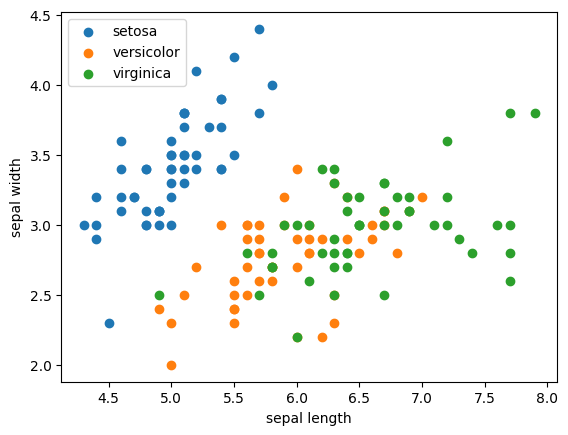

In [2]:
X = data.iloc[:, [0, 1]].values
from pylab import *

# розбиваємо дані на окремі групи за класом
setosa = X[data['class label']=='Iris-setosa']
versicolor = X[data['class label']=='Iris-versicolor']
virginica = X[data['class label']=='Iris-virginica']

# побудова графіку для кожної групи
scatter(setosa[:, 0], setosa[:, 1], label='setosa')
scatter(versicolor[:, 0], versicolor[:, 1], label='versicolor')
scatter(virginica[:, 0], virginica[:, 1], label='virginica')

# додавання назв вісей
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()

### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм $k$-means для $k=2$, $k=3$, $k=4$ з оптимізацією та без, побудуйте діаграми кластерів
* порівняйте результати кластеризації при $k=3$ з діаграмою класів
* побудуйте залежність кількості кластерів $k$ та квадратичного критерію інерції 
* зробіть висновки

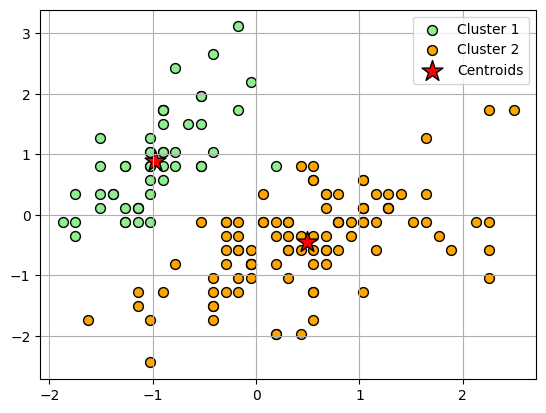

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(data[['sepal length', 'sepal width']])

# Формування масиву характеристик X
X = data[['sepal length', 'sepal width']].values

from sklearn.cluster import KMeans

# Кластеризація з k=2 без оптимізації
km2 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km2 = km2.fit_predict(X_std)

import matplotlib.pyplot as plt

# Діаграма кластерів
plt.scatter(X_std[y_km2 == 0, 0], X_std[y_km2 == 0, 1], s=50, c='lightgreen', edgecolor='black', label='Cluster 1')
plt.scatter(X_std[y_km2 == 1, 0], X_std[y_km2 == 1, 1], s=50, c='orange', edgecolor='black', label='Cluster 2')
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

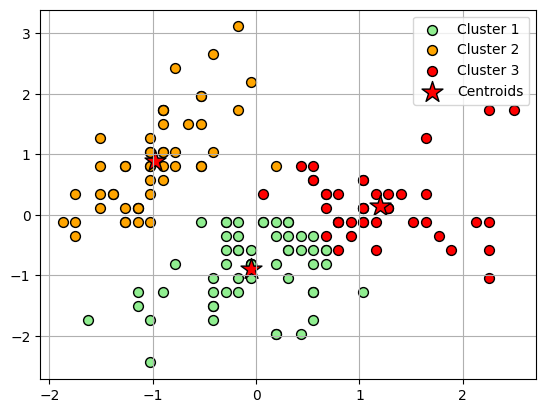

In [6]:
# Кластеризація з k=3 з оптимізацією
km3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km3 = km3.fit_predict(X_std)

# Діаграма кластерів
plt.scatter(X_std[y_km3 == 0, 0], X_std[y_km3 == 0, 1], s=50, c='lightgreen', edgecolor='black', label='Cluster 1')
plt.scatter(X_std[y_km3 == 1, 0], X_std[y_km3 == 1, 1], s=50, c='orange', edgecolor='black', label='Cluster 2')
plt.scatter(X_std[y_km3 == 2, 0], X_std[y_km3 == 2, 1], s=50, c='red', edgecolor='black', label='Cluster 3')
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

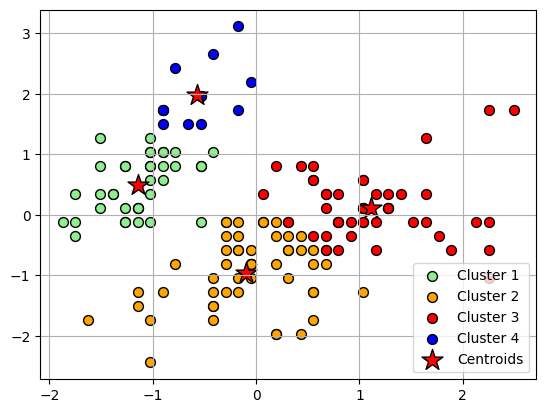

In [7]:
# Кластеризація з k=3 з оптимізацією
km4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km4 = km4.fit_predict(X_std)

# Діаграма кластерів
plt.scatter(X_std[y_km4 == 0, 0], X_std[y_km4 == 0, 1], s=50, c='lightgreen', edgecolor='black', label='Cluster 1')
plt.scatter(X_std[y_km4 == 1, 0], X_std[y_km4 == 1, 1], s=50, c='orange', edgecolor='black', label='Cluster 2')
plt.scatter(X_std[y_km4 == 2, 0], X_std[y_km4 == 2, 1], s=50, c='red', edgecolor='black', label='Cluster 3')
plt.scatter(X_std[y_km4 == 3, 0], X_std[y_km4 == 3, 1], s=50, c='blue', edgecolor='black', label='Cluster 4')
plt.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

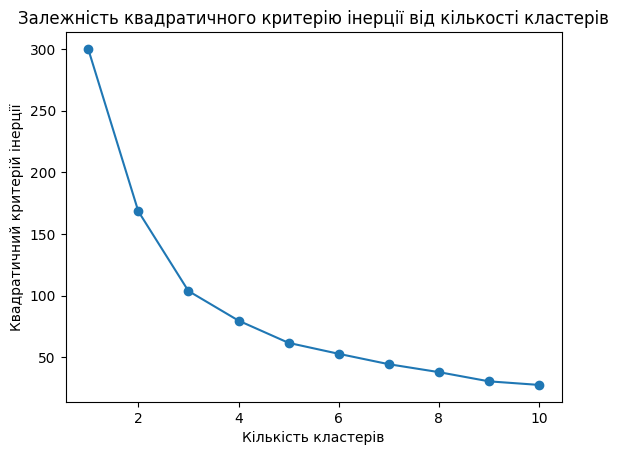

In [8]:
# Побудова графіку критерію інерції від кількості кластерів
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Квадратичний критерій інерції')
plt.title('Залежність квадратичного критерію інерції від кількості кластерів')
plt.show()

Висновки:

Очевидно отримані кластери не збігаються з класами ірису, оскільки versicolor та virginica є дуже подібними за обраними характеристиками і сусідні на графіку точки можуть без проблем належати до різних класів. Єдиний клас що приблизно збігається з кластером - це setosa. Він на графіку очевидно знаходиться окремо (тобто його характеристики суттєво відрізняються від двох інших класів) і під нього завжди виділяється окремий кластер. Саме тому точність на цьому класі у минулих класифікаційних задачах була 100%.   
Щодо графіку квадратичного критерію інерції - він є закономірним, оскільки чим більше кластерів, тим потенційно щільніше будуть його точки до центроїда.

### Завдання №3

* застосуйте алгоритм `DBSCAN`та побудуйте діаграму кластерів
* зробіть висновки


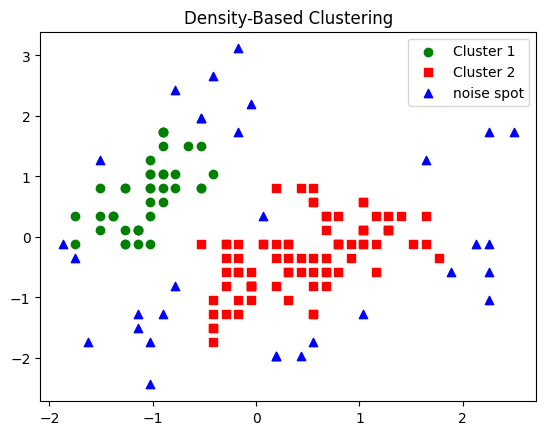

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4,min_samples=5,metric="euclidean")

dbscan_y = dbscan.fit_predict(X_std)
# Точки кластеру 1
plt.scatter(X_std[dbscan_y == 0,0], X_std[dbscan_y == 0,1], c = "green", marker = "o", label = "Cluster 1")
# Точки кластеру 2
plt.scatter(X_std[dbscan_y == 1,0], X_std[dbscan_y == 1,1], c = "red", marker = "s", label = "Cluster 2")
# Викиди (шум)
plt.scatter(X_std[dbscan_y == - 1,0], X_std[dbscan_y == - 1,1], c = "blue", marker = "^", label = "noise spot")
# Заголовок діаграми
plt.title ("Density-Based Clustering")
plt.legend()
plt.show()

DBSCAN додає можливість налаштовувати чутливість кластеризації, що безперечно є плюсом, але з іншої сторони при неправильному встановленні epsilon кластеризація або не відбудеться взагалі (декілька точок до кластера, а інше шум), або відбудеться неправильно (все один кластер).  
На мою думку цей метод ефективний, якщо програмісту відома приблизна структура кластерів на виході і він може налаштувати чутливість алгоритму, щоб кластеризація відповідала його очікуванням.

### Завдання №4

* застосуйте алгоритм агломеративної ієрархії та побудуйте діаграму кластерів
* побудуйте дендрограму
* зробіть висновки


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


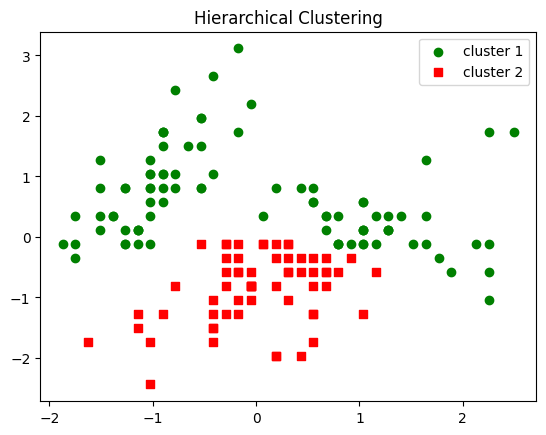

In [15]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")
ac_y = ac.fit_predict(X_std)

# Точки кластеру 1
plt.scatter(X_std[ac_y == 0,0],X_std[ac_y == 0,1], c = "green", marker = "o", label = "cluster 1")
# Точки кластеру 2
plt.scatter (X_std[ac_y == 1,0],X_std[ac_y == 1,1], c = "red", marker = "s", label = "cluster 2")
# Заголовок
plt.title ("Hierarchical Clustering")
plt.legend()
plt.show()

In [16]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X_std,X_std) 
print(dist_matrix)

[[0.         1.18212094 0.84665957 ... 2.05335999 1.35278503 1.50940687]
 [1.18212094 0.         0.52241357 ... 1.93868593 1.82700757 1.2116787 ]
 [0.84665957 0.52241357 0.         ... 2.22958401 1.87551625 1.52589231]
 ...
 [2.05335999 1.93868593 2.22958401 ... 0.         0.99443059 0.72700722]
 [1.35278503 1.82700757 1.87551625 ... 0.99443059 0.         0.99443059]
 [1.50940687 1.2116787  1.52589231 ... 0.72700722 0.99443059 0.        ]]


In [17]:
from scipy.cluster import hierarchy 
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-17-d7b2827b4c7b>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


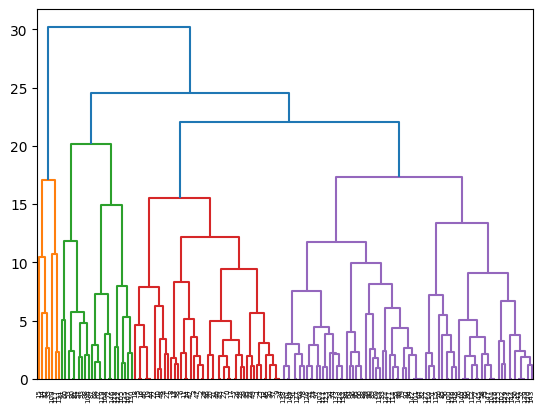

In [18]:
dendro = hierarchy.dendrogram(Z)

Візуально цей метод справився найгірше, неправильно класифікувавши навіть той кластер, який інші кластеризували легко.


### Завдання №5

* порівняйте результати кластеризації методами $k$-means, DBSCAN та агломеративної ієрархії  
* зробіть висновки

На мою думку, найкраще справляється метод k-means та можливо DBSCAN, оскільки в ньому можна налаштовувати чутливість кластеризації. Взагалі кластеризація простими методами для нашого датасету не підходить, оскільки два з трьох класів є занадто схожими по характеристикам і сусідні точки без проблем можуть бути різними класами. Майже всі методи впоралися з кластеризацією першого класу, але з метод агломеративної ієрархії візуально показав не дуже гарні результати кластеризації.